In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

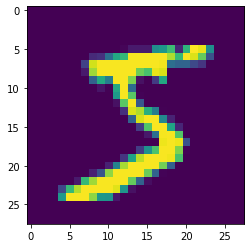

In [12]:
plt.imshow(x_train[0])

In [26]:
inp_lay = Input(shape=(28,28,))
flat = Flatten()(inp_lay)
dense_1 = Dense(500, activation='relu')(flat)
dense_2 = Dense(100, activation='relu')(dense_1)
out = Dense(10, activation='softmax')(dense_1)

model = Model(inp_lay, out)
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
his = model.fit(x_train, y_train,batch_size=32, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 259us/sample - loss: 0.2010 - accuracy: 0.9410 - val_loss: 0.0980 - val_accuracy: 0.9684
Epoch 2/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.0822 - accuracy: 0.9752 - val_loss: 0.0916 - val_accuracy: 0.9713
Epoch 3/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0529 - accuracy: 0.9831 - val_loss: 0.0683 - val_accuracy: 0.9787
Epoch 4/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0656 - val_accuracy: 0.9798
Epoch 5/10
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0860 - val_accuracy: 0.9749
Epoch 6/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0761 - val_accuracy: 0.9785
Epoch 7/10
60000/60000 [====================

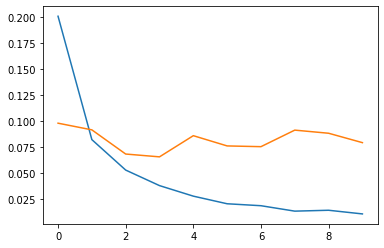

In [32]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

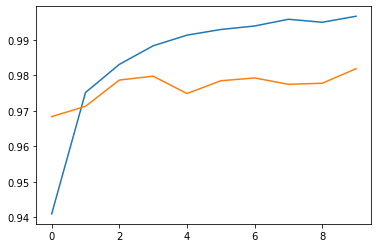

In [33]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])

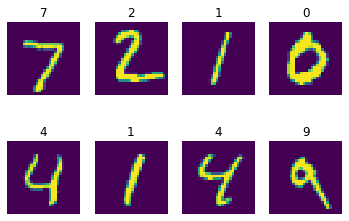

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=4)
count = 0
for rows in ax:
    for col in rows:
        col.imshow(x_test[count])
        col.axis('off')
        pred = np.argmax(model.predict(x_test[count:count+1]))
        col.set_title(pred)
        count+=1


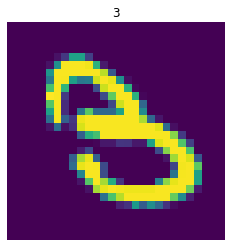

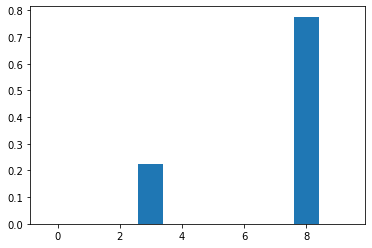

In [79]:
nr = 18
plt.imshow(x_test[nr])
plt.title(np.argmax(y_test[nr]))
plt.axis('off')
pred = model.predict(x_test[nr:nr+1])[0]
plt.figure()
plt.bar(x = np.arange(0,10,1), height = pred)
plt.show()

In [74]:
pred = model.predict(x_test[0:200])
vP = np.argsort(np.var(pred, axis = 1))
vP

array([139, 151,   8,  18, 149, 175, 104,  96, 121, 111,  24, 193, 195,
       171,  38, 189,  63,  61, 119,  49, 191,  64,  62, 177, 124,  42,
        59,  97,  80,  79,  31, 158, 122,  21,  78, 187,  92, 199,  65,
       179, 190, 114, 160,   4, 116, 159,   7,  36, 115,  20,  46, 184,
       125,  34, 146,   2, 107, 137,  40,  41, 154,  15,  89,  43,  57,
       133,  54,   6,  84,  85,  93, 180,   9,  58, 182,  29,  33, 145,
        50, 100,   5, 144, 185, 173,  86,  90,  73,  95,  37, 176, 140,
        81, 109, 126,  53,  94,  98,  83, 192, 118, 135, 178, 143, 169,
       131,  99,  74,  39,  11,  14,  77,  28, 106, 172,  32, 170,  35,
       168, 167, 166, 164, 163, 162, 161,  44,  45, 157, 156, 155, 165,
        30,  27,  47, 197, 196,   1, 194,   3,  10,  13, 188, 186,  17,
       183,  19, 181,  22,  23,  25,  26, 174, 153, 152,  48, 105, 127,
        72,  75, 123,  76, 120,  82, 129,  87,  88,  91, 198, 112, 101,
       110, 102, 103, 117, 130, 128, 132, 150,  51, 148, 147,  5

In [49]:
model.save('parameters.h5')